# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

# Load Dataset

In [2]:
df = pd.read_csv('loan_data_2007_2014.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Exploring Data

In [3]:
df.shape

(466285, 75)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

* Dataframe memiliki total 466285 baris dan 75 kolom
* Dataframe masih memiliki *null* values di beberapa kolom
* Target klasifikasi adalah kolom `loan_status` dengan tipe data `object`
* Sisanya adalah *feature* (predictor)



In [5]:
df.sample(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
152200,152200,3923077,5147201,12000,12000,12000.0,36 months,11.14,393.67,B,B2,USAF,10+ years,MORTGAGE,47000.0,Verified,Apr-13,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 03/28/13 > I plan to pay o...,credit_card,Credit card refinance,960xx,CA,17.74,0.0,Jul-04,1.0,NaN,NaN,8.0,0.0,8940,70.4,12.0,f,0.00,0.00,12709.64,12709.64,12000.00,709.64,0.0,0.0,0.0,Jan-14,2561.46,NaN,Jan-14,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,103220.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12700.0,NaN,NaN,NaN
441979,441979,11657509,13629693,17500,17500,17500.0,36 months,13.65,595.14,C,C1,X-RAY/NUCLEAR MEDICINE TECHNOLOGIST,6 years,RENT,58750.0,Source Verified,Feb-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 02/17/14 > I have two cred...,credit_card,Credit card refinancing,609xx,IL,7.58,0.0,Jul-98,0.0,NaN,NaN,3.0,0.0,17512,100.1,14.0,f,7662.18,7662.18,13093.08,13093.08,9837.82,3255.26,0.0,0.0,0.0,Dec-15,595.14,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,17512.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17500.0,NaN,NaN,NaN
216665,216665,1296771,1541760,11800,11800,11550.0,36 months,10.74,384.87,B,B2,union distributing,10+ years,MORTGAGE,65000.0,Source Verified,May-12,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 05/14/12 > this loan will ...,credit_card,Credit Card,857xx,AZ,20.20,0.0,Aug-94,0.0,NaN,NaN,16.0,0.0,20485,64.8,26.0,f,0.00,0.00,13176.11,12896.95,11800.00,1376.11,0.0,0.0,0.0,Oct-13,7407.96,NaN,Dec-14,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
334469,334469,22201529,24524467,22400,22400,22400.0,36 months,14.99,776.40,C,C5,SUPERVISOR,10+ years,MORTGAGE,80000.0,Verified,Jul-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,390xx,MS,29.01,1.0,Sep-95,0.0,18.0,NaN,10.0,0.0,8083,89.0,27.0,w,0.00,0.00,13198.80,13198.80,9340.68,3858.12,0.0,0.0,0.0,Jan-16,13949.92,NaN,Jan-16,0.0,103.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,163632.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9100.0,NaN,NaN,NaN
408116,408116,13997953,16050355,14400,14400,14400.0,36 months,7.62,448.73,A,A3,Administrative Ass't.,10+ years,MORTGAGE,66000.0,Source Verified,Apr-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,333xx,FL,15.86,1.0,Oct-85,0.0,11.0,NaN,17.0,0.0,10921,29.8,29.0,w,0.00,0.00,15587.89,15587.89,14400.00,1187.89,0.0,0.0,0.0,Aug-15,8856.94,NaN,Aug-15,0.0,76.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,2711.0,152008.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36600.0,NaN,NaN,NaN


In [6]:
df.id.nunique()

466285

In [7]:
df.member_id.nunique()

466285

Terlihat bahwa tidak ada `id` atau `member_id` yang duplikat

Selanjutnya, pembuangan fitur-fitur yang tidak berguna. Contohnya seperti fitur yang merupakan id unik, berupa free text, nilainya kosong semua

In [8]:
col_to_drop = [
    # unique id
    'id' , 'member_id'
    
    # free text
    , 'url' , 'desc'
    
    # all null / constant / others
    , 'zip_code' , 'annual_inc_joint' , 'dti_joint' , 'verification_status_joint' , 'open_acc_6m' , 'open_il_6m'
    , 'open_il_12m' , 'open_il_24m' , 'mths_since_rcnt_il' , 'total_bal_il' , 'il_util' , 'open_rv_12m' , 'open_rv_24m'
    , 'max_bal_bc' , 'all_util' , 'inq_fi' , 'total_cu_tl' , 'inq_last_12m'
    
    # expert judgment
    , 'sub_grade'
]

In [9]:
data = df.drop(col_to_drop, axis=1)

In [10]:
data.sample(5)

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
295745,295745,10725,10725,10725.0,60 months,22.15,297.13,E,COOK,< 1 year,RENT,36079.0,Source Verified,Oct-14,Current,n,debt_consolidation,Debt consolidation,FL,23.46,0.0,May-02,0.0,49.0,NaN,6.0,0.0,5051,82.8,15.0,w,9029.08,9029.08,4456.95000,4456.95,1695.92,2761.03,0.0,0.0,0.0,Jan-16,297.13,Feb-16,Jan-16,0.0,49.0,1,INDIVIDUAL,0.0,0.0,8569.0,6100.0
32150,32150,8500,8500,8400.0,36 months,7.88,265.89,A,Cross Country Staffing,2 years,RENT,47500.0,Not Verified,Feb-10,Fully Paid,n,debt_consolidation,Credit,FL,11.70,0.0,Nov-00,0.0,NaN,NaN,9.0,0.0,9205,52.0,22.0,f,0.00,0.00,9221.40000,9112.92,8500.00,721.40,0.0,0.0,0.0,Jul-11,5239.63,NaN,Jul-11,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
96953,96953,11000,11000,11000.0,36 months,18.85,402.39,D,Farmers Insurance Group,2 years,MORTGAGE,146000.0,Source Verified,Sep-13,Charged Off,n,debt_consolidation,consolidation-C.C,VA,6.51,1.0,Oct-08,1.0,23.0,NaN,9.0,0.0,9082,65.3,18.0,w,0.00,0.00,6438.24000,6438.24,4139.77,2298.47,0.0,0.0,0.0,Jan-15,402.39,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,25773.0,13900.0
204563,204563,20000,20000,19975.0,36 months,7.62,623.23,A,Bristol Myers Squibb,10+ years,MORTGAGE,128000.0,Verified,Aug-12,Fully Paid,n,home_improvement,"Roof, etc",NJ,4.95,0.0,Sep-94,0.0,NaN,NaN,5.0,0.0,4100,21.7,21.0,f,0.00,0.00,22176.38907,22148.69,20000.00,2176.39,0.0,0.0,0.0,Sep-14,7254.15,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
250251,250251,15000,15000,15000.0,36 months,11.44,494.22,B,Director of Marketing,5 years,RENT,85000.0,Not Verified,Nov-14,Current,n,debt_consolidation,Debt consolidation,RI,13.03,0.0,Apr-98,0.0,79.0,NaN,9.0,0.0,6404,87.7,18.0,f,9766.30,9766.30,6903.61000,6903.61,5233.70,1669.91,0.0,0.0,0.0,Jan-16,494.22,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,23757.0,7300.0


# Define Target Variabel

Dalam dataset ini, variabel `loan_status` adalah variabel yang dapat dijadikan variabel target karena mencerminkan performa masing-masing individu dalam melakukan pembayaran terhadap pinjaman/kredit selama ini.

In [11]:
data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [12]:
data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


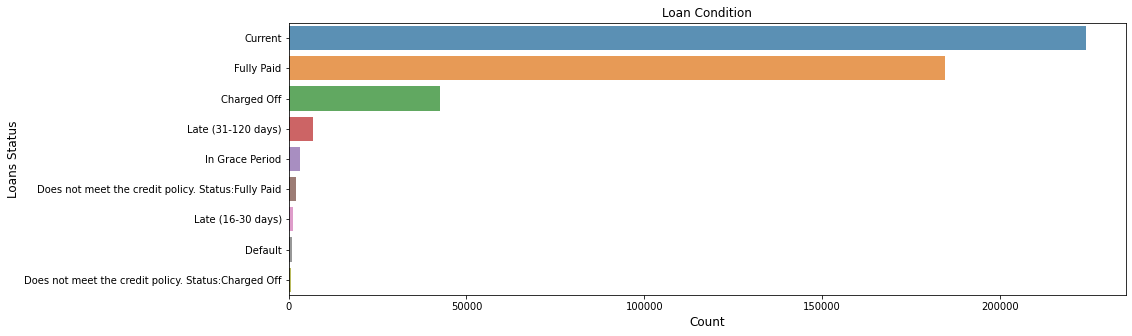

In [13]:
loan_c = data['loan_status'].value_counts()
loan_c = loan_c[:10,]
plt.figure(figsize=(15,5))
sns.barplot(loan_c.values, loan_c.index, alpha=0.8)
plt.title('Loan Condition')
plt.ylabel('Loans Status', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.show()

* Terdapat 9 nilai unik pada kolom `loan_status` yang akan menjadi target model.
* Dibagi menjadi dua kelompok, yaitu "good_loan" dengan angka 1 dan "bad_loan" dengan angka 0
* "good_loan" didefinisikan memiliki status `Current`, `Fully Paid`, dan `In Grace Period`
* "bad_loan" didefinisikan sebagai status selain dari "good_loan"

Mengelompokkan `loan_condition` menjadi good_loan dan bad_loan

In [14]:
bad_status = [
    'Charged Off' 
    , 'Default' 
    , 'Does not meet the credit policy. Status:Charged Off'
    , 'Does not meet the credit policy. Status:Fully Paid'
    , 'Late (16-30 days)'
    , 'Late (31-120 days)'
]

data['bad_flag'] = np.where(data['loan_status'].isin(bad_status), 1, 0)

In [15]:
data.drop('loan_status', axis=1, inplace=True)

# CLEANING, PREPROCESSING, FEATURE ENGINEERING

Pada step ini, dilakukan pembersihan/modifikasi beberapa fitur ke dalam format yang dapat digunakan untuk modeling.

### emp_length

Memodifikasi `emp_length`. Contoh: 4 years -> 4

In [16]:
data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [17]:
data['emp_length_int'] = data['emp_length'].str.replace('\+ years', '')
data['emp_length_int'] = data['emp_length_int'].str.replace('< 1 year', str(0))
data['emp_length_int'] = data['emp_length_int'].str.replace(' years', '')
data['emp_length_int'] = data['emp_length_int'].str.replace(' year', '')

<ipython-input-17-a93402c6aad3>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['emp_length_int'] = data['emp_length'].str.replace('\+ years', '')


In [18]:
data['emp_length_int'] = data['emp_length_int'].astype(float)

In [19]:
data.drop('emp_length', axis=1, inplace=True)

### term

Memodifikasi `term`. Contoh: 36 months -> 36

In [20]:
data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [21]:
data['term_int'] = data['term'].str.replace(' months', '')
data['term_int'] = data['term_int'].astype(float)

In [22]:
data.drop('term', axis=1, inplace=True)

### earliest_cr_line

Memodifikasi `earliest_cr_line` dari format bulan-tahun menjadi perhitungan berapa lama waktu berlalu sejak waktu tersebut. Untuk melakukan hal ini, umumnya digunakan reference date = hari ini. Namun, karena dataset ini merupakan dataset tahun 2007-2014, maka akan lebih relevan jika menggunakan reference date di sekitar tahun 2017. Dalam contoh ini, saya menggunakan tanggal 2017-12-01 sebagai reference date.

In [23]:
data['earliest_cr_line'].head(5)

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

In [24]:
data['earliest_cr_line_date'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%y')
data['earliest_cr_line_date'].head(5)

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [25]:
data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
data['mths_since_earliest_cr_line'].head(5)

0    395.0
1    224.0
2    193.0
3    262.0
4    263.0
Name: mths_since_earliest_cr_line, dtype: float64

In [26]:
data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

Terlihat ada nilai yang aneh, yaitu negatif.

In [27]:
data[data['mths_since_earliest_cr_line']<0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']].head(5)

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0
3282,Sep-67,2067-09-01,-597.0
3359,Feb-65,2065-02-01,-566.0


Ternyata nilai negatif muncul karena fungsi Python salah menginterpretasikan tahun 62 menjadi tahun 2062, padahal seharusnya merupakan tahun 1962.

Untuk mengatasi hal ini, dapat dilakukan preprocessing lebih jauh jika ingin membenarkan tahun 2062 menjadi 1962. Namun, kali ini saya hanya mengubah nilai yang negatif menjadi nilai maximum dari fitur tersebut. Karena di sini saya mengetahui bahwa nilai-nilai yang negatif artinya adalah data yang sudah tua (tahun 1900an), maka masih masuk akal jika saya mengganti nilai-nilai tersebut menjadi nilai terbesar.

In [28]:
data.loc[data['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = data['mths_since_earliest_cr_line'].max()

In [29]:
data.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

### issue_d

Konsep preprocessing yang dilakukan sama dengan yang dilakukan terhadap variabel `earliest_cr_line`

In [30]:
data['issue_d_date'] = pd.to_datetime(data['issue_d'], format='%b-%y')
data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['issue_d_date']) / np.timedelta64(1, 'M')))

In [31]:
data.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

### last_pymnt_d

Konsep preprocessing yang dilakukan sama dengan yang dilakukan terhadap variabel `earliest_cr_line`

In [32]:
data['last_pymnt_d_date'] = pd.to_datetime(data['last_pymnt_d'], format='%b-%y')
data['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['last_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [33]:
data['mths_since_last_pymnt_d'].describe()

count    465909.000000
mean         31.294369
std          12.809898
min          23.000000
25%          23.000000
50%          24.000000
75%          35.000000
max         120.000000
Name: mths_since_last_pymnt_d, dtype: float64

In [34]:
data.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

### next_pymnt_d

Konsep preprocessing yang dilakukan sama dengan yang dilakukan terhadap variabel `earliest_cr_line`

In [35]:
data['next_pymnt_d_date'] = pd.to_datetime(data['next_pymnt_d'], format='%b-%y')
data['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['next_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [36]:
data['mths_since_next_pymnt_d'].describe()

count    239071.000000
mean         22.738136
std           6.082298
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         120.000000
Name: mths_since_next_pymnt_d, dtype: float64

In [37]:
data.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

### last_credit_pull_d

Konsep preprocessing yang dilakukan sama dengan yang dilakukan terhadap variabel `earliest_cr_line`

In [38]:
data['last_credit_pull_d_date'] = pd.to_datetime(data['last_credit_pull_d'], format='%b-%y')
data['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))

In [39]:
data['mths_since_last_credit_pull_d'].describe()

count    466243.000000
mean         27.045588
std           9.636423
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: mths_since_last_credit_pull_d, dtype: float64

In [40]:
data.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 52 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     466285 non-null  int64  
 1   loan_amnt                      466285 non-null  int64  
 2   funded_amnt                    466285 non-null  int64  
 3   funded_amnt_inv                466285 non-null  float64
 4   int_rate                       466285 non-null  float64
 5   installment                    466285 non-null  float64
 6   grade                          466285 non-null  object 
 7   emp_title                      438697 non-null  object 
 8   home_ownership                 466285 non-null  object 
 9   annual_inc                     466281 non-null  float64
 10  verification_status            466285 non-null  object 
 11  pymnt_plan                     466285 non-null  object 
 12  purpose                       

Dari informasi di atas, kita bisa pisahkan kolom *numerical* dan *categorical* sebagai berikut:

In [42]:
nums = [key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64', 'int64']]
cats = [key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object']]

## Descriptive Statistics

Ringkasan statistik dataframe untuk *numerical*

In [43]:
data[nums].describe()

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,bad_flag,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_next_pymnt_d,mths_since_last_credit_pull_d
count,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,466256.000000,3.960090e+05,3.960090e+05,3.960090e+05,466285.000000,445277.000000,466285.000000,466256.000000,466285.000000,465909.000000,239071.000000,466243.000000
mean,233142.000000,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,0.004002,1.919135e+02,1.388017e+05,3.037909e+04,0.116182,5.993330,42.605334,242.385374,51.255187,31.294369,22.738136,27.045588
std,134605.029472,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,0.068637,1.463021e+04,1.521147e+05,3.724713e+04,0.320444,3.627044,10.719040,86.460310,14.340154,12.809898,6.082298,9.636423
min,0.000000,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,36.000000,73.000000,36.000000,23.000000,21.000000,23.000000
25%,116571.000000,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,0.000000,0.000000e+00,2.861800e+04,1.350000e+04,0.000000,3.000000,36.000000,184.000000,41.000000,23.000000,22.000000,23.000000
50%,233142.000000,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,0.000000,0.000000e+00,8.153900e+04,2.280000e+04,0.000000,6.000000,36.000000,226.000000,47.000000,24.000000,22.000000,23.000000
75%,349713.000000,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,0.000000,0.000000e+00,2.089530e+05,3.790000e+04,0.000000,10.000000,60.000000,285.000000,57.000000,35.000000,22.000000,25.000000
max,466284.000000,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,33.000000

Ringkasan statistik dataframe untuk *categorical*

In [44]:
data[cats].describe()

,grade,emp_title,home_ownership,verification_status,pymnt_plan,purpose,title,addr_state,initial_list_status,application_type
count,466285,438697,466285,466285,466285,466285,466265,466285,466285,466285
unique,7,205475,6,3,2,14,63099,50,2,1
top,B,Teacher,MORTGAGE,Verified,n,debt_consolidation,Debt consolidation,CA,f,INDIVIDUAL
freq,136929,5399,235875,168055,466276,274195,164075,71450,303005,466285


* Beberapa fitur kategori memiliki terlalu banyak nilai unik dan hanya memiliki satu nilai unik

## Univariate Analysis

Dist Plots

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


ValueError: ignored

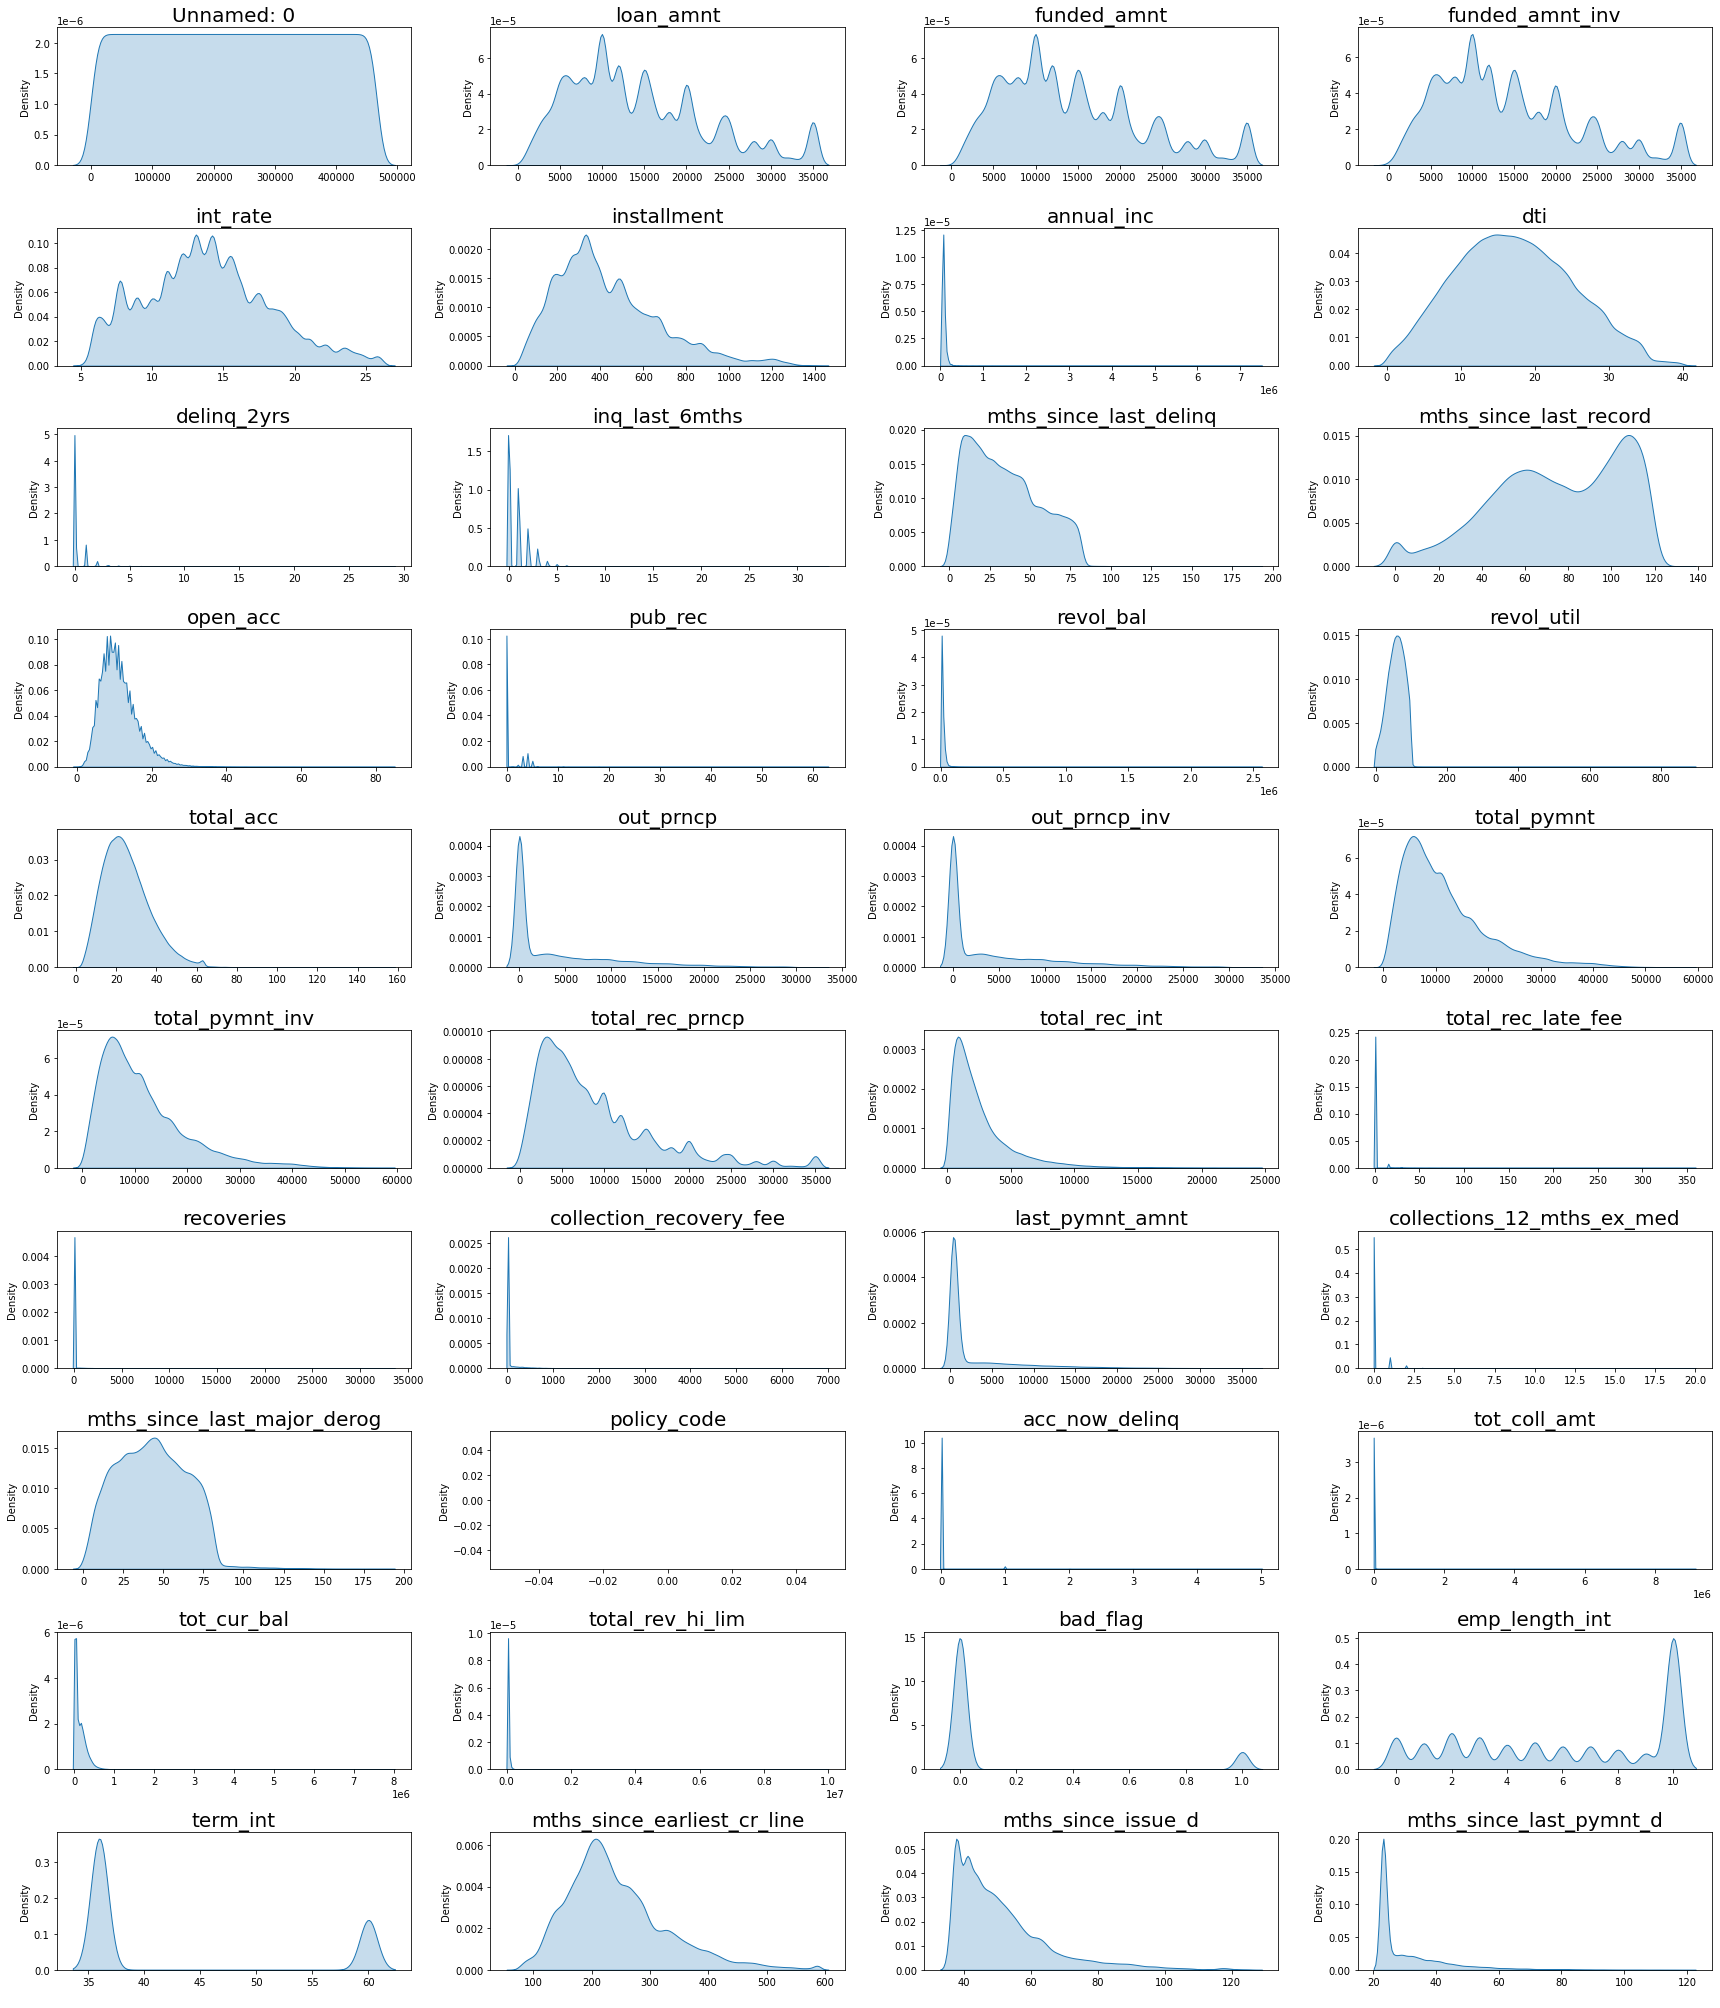

In [45]:
plt.figure(figsize=(24,28))
for i in range(0,len(nums)):
    plt.subplot(10,4,i+1)
    sns.kdeplot(x=data[nums[i]], palette='viridis', shade=True)
    plt.title(nums[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

* Mayoritas fitur *numerical* tidak terdistribusi secara normal

## Multivariate Analysis

Correlation Heatmap

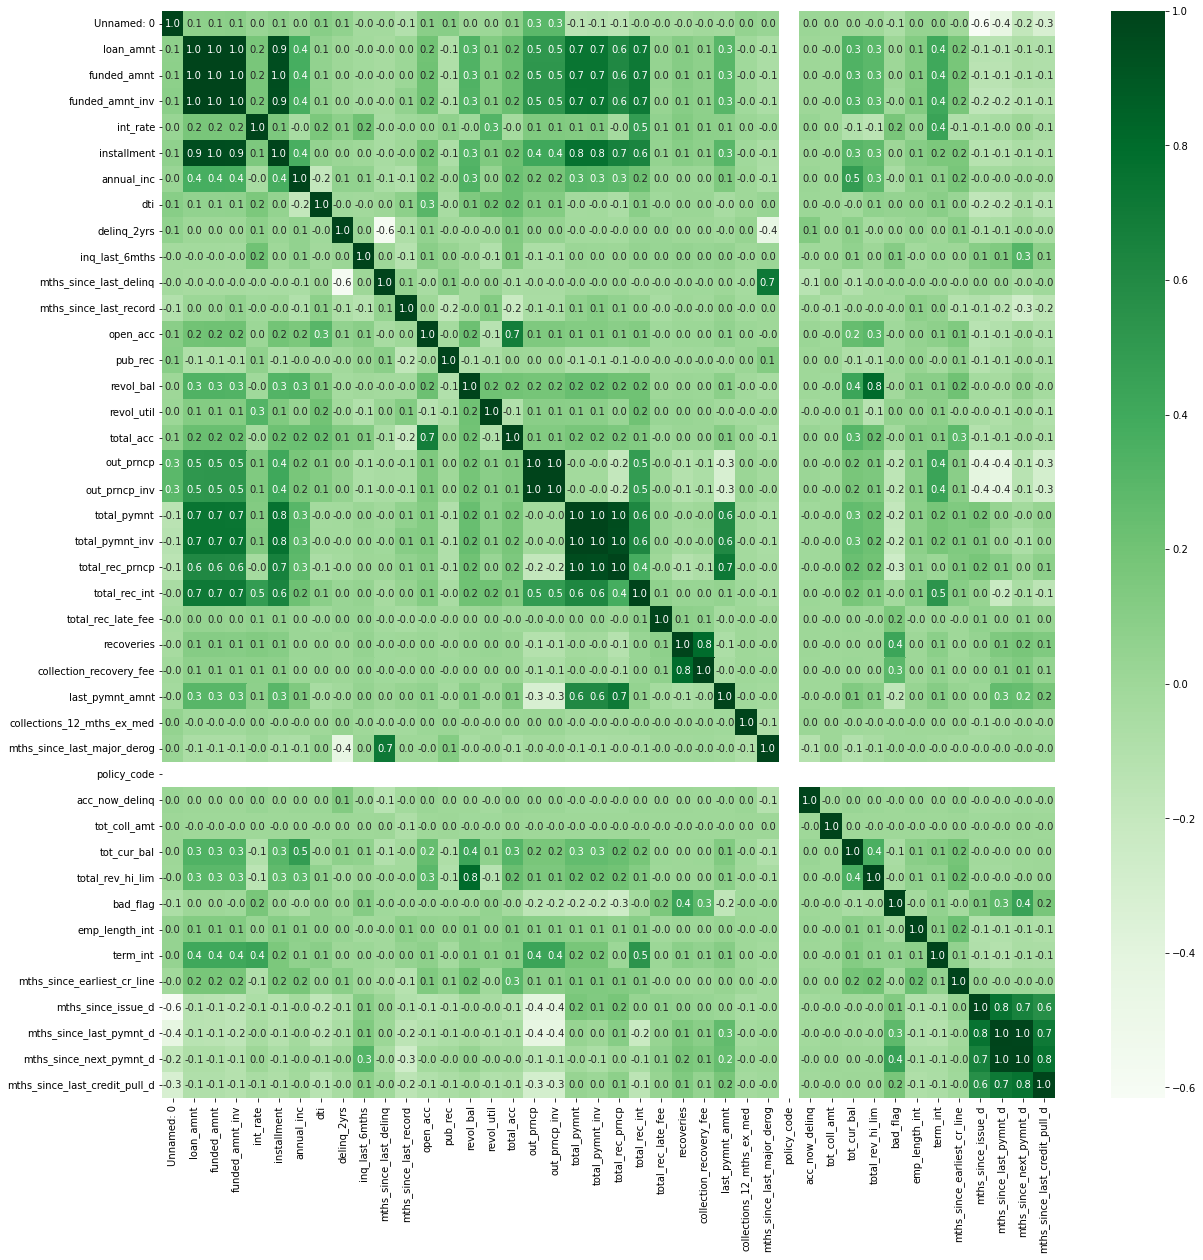

In [46]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), cmap='Greens', annot=True, fmt='.1f')

* Tampaknya ada beberapa fitur independen yang sangat berkorelasi positif kuat satu sama lain, kemungkinan redundan

Di sini, jika ada pasangan fitur-fitur yang memiliki korelasi tinggi maka akan diambil salah satu saja. Nilai korelasi yang dijadikan patokan sebagai korelasi tinggi tidak pasti, umumnya digunakan angka 0.7.

In [47]:
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

<ipython-input-47-b958f315e56a>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [48]:
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim',
 'mths_since_last_pymnt_d',
 'mths_since_next_pymnt_d',
 'mths_since_last_credit_pull_d']

In [49]:
data.drop(to_drop_hicorr, axis=1, inplace=True)

### Check Categorical Features

In [50]:
data.select_dtypes(include='object').nunique()

grade                       7
emp_title              205475
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   63099
addr_state                 50
initial_list_status         2
application_type            1
dtype: int64

Pada tahap ini dilakukan pembuangan fitur yang memiliki nilai unik yang sangat tinggi (high cardinality) dan fitur yang hanya memiliki satu nilai unik saja.

In [51]:
data.drop(['emp_title', 'title', 'application_type'], axis=1, inplace=True)

In [52]:
data.select_dtypes(exclude='object').nunique()

Unnamed: 0                     466285
loan_amnt                        1352
int_rate                          506
annual_inc                      31901
dti                              3997
delinq_2yrs                        24
inq_last_6mths                     28
mths_since_last_delinq            145
mths_since_last_record            123
open_acc                           62
pub_rec                            26
revol_bal                       58142
revol_util                       1269
total_acc                         112
out_prncp                      135665
total_rec_late_fee               5808
recoveries                      22773
collections_12_mths_ex_med          9
policy_code                         1
acc_now_delinq                      6
tot_coll_amt                     6321
tot_cur_bal                    220690
bad_flag                            2
emp_length_int                     11
term_int                            2
mths_since_earliest_cr_line       515
mths_since_i

Ternyata, pada tipe data selain `object` juga terdapat fitur yang hanya memiliki satu nilai unik saja, maka akan ikut dibuang juga.

In [53]:
data.drop(['policy_code'], axis=1, inplace=True)

In [54]:
for col in data.select_dtypes(include='object').columns.tolist():
    print(data[col].value_counts(normalize=True)*100)
    print('\n')

B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: grade, dtype: float64


MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: home_ownership, dtype: float64


Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: verification_status, dtype: float64


n    99.99807
y     0.00193
Name: pymnt_plan, dtype: float64


debt_consolidation    58.804165
credit_card           22.337626
home_improvement       5.691155
other                  5.080584
major_purchase         2.107724
small_business         1.504016
car                    1.157447
medical                0.986950
moving                 0.642097
vacation               0.533365
wedding                0.502482
house                  0.486612
educational            0.090503
renewable_energy       0.075276
Name: purpose, dtype: float64


CA    15.323247
NY  

Fitur yang sangat didominasi oleh salah satu nilai saja akan dibuang pada tahap ini.

In [55]:
data.drop('pymnt_plan', axis=1, inplace=True)

# MISSING VALUES

Memeriksa nilai-nilai yang hilang

In [56]:
check_missing = data.isnull().sum() * 100 / data.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

mths_since_last_record         86.566585
mths_since_last_delinq         53.690554
tot_coll_amt                   15.071469
tot_cur_bal                    15.071469
emp_length_int                  4.505399
revol_util                      0.072917
collections_12_mths_ex_med      0.031097
delinq_2yrs                     0.006219
inq_last_6mths                  0.006219
open_acc                        0.006219
pub_rec                         0.006219
total_acc                       0.006219
acc_now_delinq                  0.006219
mths_since_earliest_cr_line     0.006219
annual_inc                      0.000858
dtype: float64

kolom-kolom dengan missing values di atas 75% dibuang

In [57]:
data.drop('mths_since_last_record', axis=1, inplace=True)

### Missing Values Filling

In [58]:
data['annual_inc'].fillna(data['annual_inc'].mean(), inplace=True)
data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
data['acc_now_delinq'].fillna(0, inplace=True)
data['total_acc'].fillna(0, inplace=True)
data['pub_rec'].fillna(0, inplace=True)
data['open_acc'].fillna(0, inplace=True)
data['inq_last_6mths'].fillna(0, inplace=True)
data['delinq_2yrs'].fillna(0, inplace=True)
data['collections_12_mths_ex_med'].fillna(0, inplace=True)
data['revol_util'].fillna(0, inplace=True)
data['emp_length_int'].fillna(0, inplace=True)
data['tot_cur_bal'].fillna(0, inplace=True)
data['tot_coll_amt'].fillna(0, inplace=True)
data['mths_since_last_delinq'].fillna(-1, inplace=True)

# FEATURE SCALING AND TRANSFORMATION

Semua kolom kategorikal dilakukan One Hot Encoding

In [59]:
categorical_cols = [col for col in data.select_dtypes(include='object').columns.tolist()]

In [60]:
onehot = pd.get_dummies(data[categorical_cols], drop_first=True)

In [61]:
onehot.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Standardization

Semua kolom numerikal dilakukan proses standarisasi dengan StandardScaler.

In [62]:
numerical_cols = [col for col in data.columns.tolist() if col not in categorical_cols + ['bad_flag']]

In [63]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(data[numerical_cols]), columns=numerical_cols)

In [64]:
std.head()

,Unnamed: 0,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d
0,-1.732047,-1.124392,-0.729587,-0.896551,1.328632,-0.357012,0.178920,-0.708792,-1.641166,-0.31429,-0.124888,1.159498,-1.384557,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,1.764941,1.446626
1,-1.732040,-1.426088,0.330634,-0.787387,-2.065791,-0.357012,3.843328,-0.708792,-1.641166,-0.31429,-0.703378,-1.965980,-1.815538,-0.693944,-0.123464,0.057470,-0.083608,-0.058307,-0.012089,-0.792648,-1.523744,1.622784,-0.212426,1.446626
2,-1.732032,-1.438156,0.488979,-1.110294,-1.082491,-0.357012,1.095022,-0.708792,-1.841641,-0.31429,-0.642003,1.782070,-1.298361,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,-0.570896,1.446626
3,-1.732025,-0.521001,-0.077850,-0.438063,0.354248,-0.357012,0.178920,0.860811,-0.237839,-0.31429,-0.514224,-1.478018,1.028934,-0.693944,3.099264,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,0.226989,1.446626
4,-1.732017,-1.365749,-0.261438,0.122311,0.091865,-0.357012,-0.737182,0.991612,0.764538,-0.31429,0.558748,-0.094058,1.115130,-0.573268,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,-1.257509,1.622784,0.238553,1.446626


### Transformed Dataframe

Menggabungkan kembali kolom-kolom hasil transformasi 

In [65]:
data_model = pd.concat([onehot, std, data[['bad_flag']]], axis=1)

# MODELING

### Train-Test Split

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X = data_model.drop('bad_flag', axis=1)
y = data_model['bad_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
X_train.shape, X_test.shape

((373028, 100), (93257, 100))

### Training

Pada contoh ini digunakan algoritma Random Forest untuk pemodelan.

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

Feature Importance dapat ditampilkan.

In [71]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features

,feature,importance
91,recoveries,5.080398e-01
89,out_prncp,1.737048e-01
90,total_rec_late_fee,8.437104e-02
78,int_rate,6.024523e-02
99,mths_since_issue_d,3.658838e-02
76,Unnamed: 0,3.221366e-02
82,inq_last_6mths,2.244764e-02
4,grade_F,1.389031e-02
95,tot_cur_bal,1.112642e-02
2,grade_D,8.431833e-03


### Validation

Untuk mengukur performa model, dua metrik yang umum dipakai dalam dunia credit risk adalah AUC dan KS

In [72]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

AUC

In [73]:
from sklearn.metrics import roc_curve, roc_auc_score

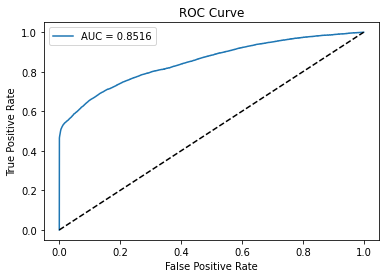

In [74]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

### KS

In [75]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

In [76]:
df_actual_predicted.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,387051,0,0.045819,1,0,1,0.000011,0.0,0.000012
1,372253,0,0.046006,2,0,2,0.000021,0.0,0.000024
2,438393,0,0.046146,3,0,3,0.000032,0.0,0.000036
3,346266,0,0.046206,4,0,4,0.000043,0.0,0.000049
4,369223,0,0.046277,5,0,5,0.000054,0.0,0.000061


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.5569')

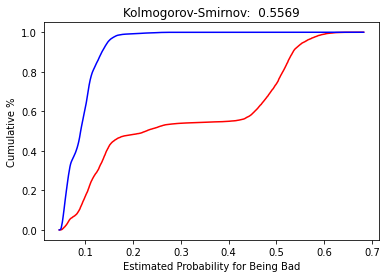

In [77]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

Model yang dibangun menghasilkan performa `AUC = 0.8516` dan `KS = 0.5599`. Pada dunia credit risk modeling, umumnya AUC di atas 0.7 dan KS di atas 0.3 sudah termasuk performa yang baik.